In [1]:
import torch
import numpy as np
from torch import nn
from torch import optim

import matplotlib.pyplot as plt

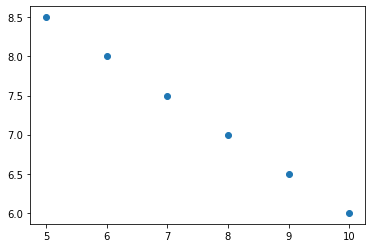

In [2]:
car_price = [5, 6, 7, 8, 9, 10]
car_sold = [8.5, 8, 7.5, 7, 6.5, 6]

plt.scatter(car_price, car_sold)

In [3]:
prices_array = np.array(car_price)
print(f'Normal     {prices_array.shape} \n{prices_array}\n')
print(f'Normal T   {prices_array.shape} \n{prices_array.T}\n')
prices_array = prices_array.reshape(-1,1)
print(f'Reshape    {prices_array.shape} \n{prices_array}\n')
print(f'Reshape T  {prices_array.shape} \n{prices_array.T}')

Normal     (6,) 
[ 5  6  7  8  9 10]

Normal T   (6,) 
[ 5  6  7  8  9 10]

Reshape    (6, 1) 
[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

Reshape T  (6, 1) 
[[ 5  6  7  8  9 10]]


In [4]:
units_array = np.array(car_sold).reshape(-1, 1)
units_array

array([[8.5],
       [8. ],
       [7.5],
       [7. ],
       [6.5],
       [6. ]])

In [5]:
prices = torch.from_numpy(prices_array)
print(f'{prices}\n')
prices = prices.float()
print(f'{prices}\n')
prices.requires_grad_(True)
print(f'{prices}\n')

tensor([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=torch.int32)

tensor([[ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

tensor([[ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], requires_grad=True)



In [6]:
units = torch.from_numpy(units_array).float()
units


tensor([[8.5000],
        [8.0000],
        [7.5000],
        [7.0000],
        [6.5000],
        [6.0000]])

9.88405299722217e-05


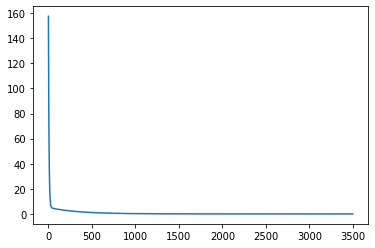

In [7]:
model = nn.Linear(1,1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.016)

losses = []
iterations = range(3500)

for i in iterations:
    pred = model(prices)
    loss = loss_function(pred, units)
    losses.append(loss.data)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(float(loss))
plt.plot(iterations, losses)

In [8]:
x = torch.tensor([5.0])
p = model(x)
p

tensor([8.4837], grad_fn=<AddBackward0>)